In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

sns.set(style="darkgrid")
%matplotlib inline

In [20]:
exBTC = data.columns.tolist()[1:]
result = data[exBTC].mul(data['BTC'], axis=0).join(data['BTC'])
exBTC

[u'ETH',
 u'XRP',
 u'BCH',
 u'LTC',
 u'DASH',
 u'XEM',
 u'BCC',
 u'NEO',
 u'XMR',
 u'ETC',
 u'QTUM',
 u'ADA',
 u'OMG',
 u'LSK',
 u'ZEC',
 u'XLM',
 u'USDT',
 u'WAVES',
 u'HSR',
 u'STRAT',
 u'BCN',
 u'ARK',
 u'PIVX',
 u'KMD',
 u'GNT',
 u'WTC',
 u'GAS',
 u'MAID',
 u'DCR',
 u'BAT',
 u'MONA',
 u'TRX',
 u'BTS',
 u'KNC',
 u'FCT',
 u'DGD',
 u'MTL',
 u'VERI',
 u'GAME',
 u'PPT',
 u'BNB',
 u'SALT',
 u'ICN',
 u'BLOCK',
 u'VTC',
 u'GBYTE',
 u'DOGE',
 u'ETP',
 u'SC',
 u'BTCD',
 u'CVC',
 u'LKK',
 u'ZRX',
 u'SYS',
 u'SNT',
 u'ATM',
 u'LINK',
 u'BNT',
 u'BTM',
 u'SNGLS',
 u'GNO',
 u'MCO',
 u'MCAP',
 u'FUN',
 u'DGB',
 u'AE',
 u'VEN',
 u'XVG',
 u'BDL',
 u'NXS',
 u'NXT',
 u'NLC2',
 u'SMART',
 u'BQX',
 u'ANT',
 u'TAAS',
 u'PART',
 u'ATB',
 u'NEBL',
 u'ZEN',
 u'UBQ',
 u'NAV',
 u'LRC',
 u'KIN',
 u'ADX',
 u'IOC',
 u'MGO',
 u'MLN',
 u'WINGS',
 u'RLC',
 u'CTR',
 u'SNM',
 u'XZC',
 u'AST',
 u'DNT',
 u'DCN',
 u'REQ',
 u'EDG',
 u'QRL',
 u'FAIR',
 u'STORJ',
 u'TKN',
 u'ENG',
 u'NLG',
 u'PPC',
 u'CLOAK',
 u'SUB',
 u'

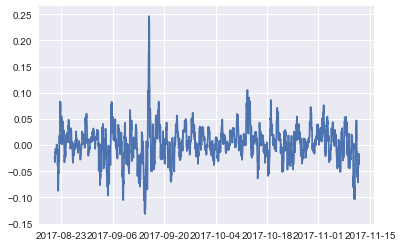

In [25]:
data = pd.read_excel('returns_OCT.xlsx', index_col='time')
exBTC = data.columns.tolist()[1:]
data = data[exBTC].mul(data['BTC'], axis=0).join(data['BTC'])

p_len = 12
df = data.pct_change(p_len)
df = df.iloc[p_len:]

df = df.loc[:,(df.applymap(lambda x: x < 5).all(axis=0) == True)]
plt.plot(df['BTC'])

In [22]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print sum(rand_weights(len(df)))
print rand_weights(len(df))

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

1.0
[ 0.00038093  0.00092198  0.00016294 ...,  0.00082587  0.0008178
  0.00097673]


In [23]:
n_portfolios = 2500
means, stds = np.column_stack([
    random_portfolio(df) 
    for _ in xrange(n_portfolios)
])


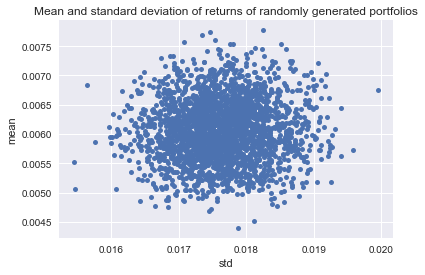

In [24]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')